## import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

C:\Users\Acer\AppData\Local\Temp\ipykernel_10840\1440010943.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Read dataset

In [3]:
# Set seaborn style for better visuals
sns.set(style="whitegrid")
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


## Data Mining

In [4]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe(include='all'))


Descriptive Statistics:
                  Timestamp           Age Gender        Country state  \
count                  1259  1.259000e+03   1259           1259   744   
unique                 1246           NaN     49             48    45   
top     2014-08-27 12:44:51           NaN   Male  United States    CA   
freq                      2           NaN    615            751   138   
mean                    NaN  7.942815e+07    NaN            NaN   NaN   
std                     NaN  2.818299e+09    NaN            NaN   NaN   
min                     NaN -1.726000e+03    NaN            NaN   NaN   
25%                     NaN  2.700000e+01    NaN            NaN   NaN   
50%                     NaN  3.100000e+01    NaN            NaN   NaN   
75%                     NaN  3.600000e+01    NaN            NaN   NaN   
max                     NaN  1.000000e+11    NaN            NaN   NaN   

       self_employed family_history treatment work_interfere no_employees  \
count           1241 

####  Key Insights Extraction

In [5]:
#  Prevalence of Mental Health Interference
interference_counts = df['work_interfere'].value_counts(normalize=True) * 100
print("\nPercentage of Work Interference:")
print(interference_counts)


Percentage of Work Interference:
work_interfere
Sometimes    46.733668
Never        21.407035
Rarely       17.386935
Often        14.472362
Name: proportion, dtype: float64


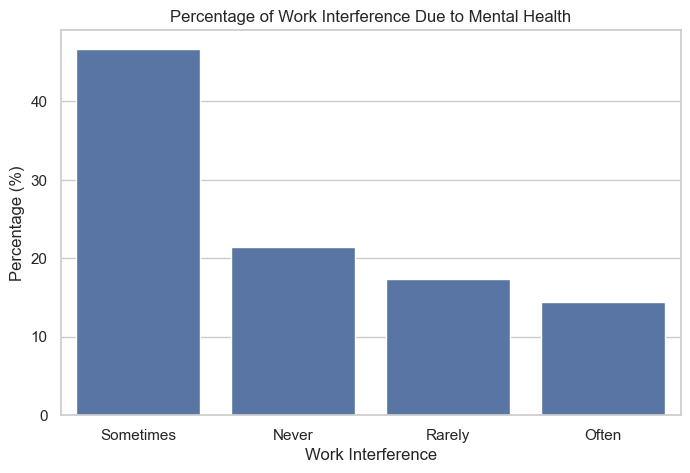

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(x=interference_counts.index, y=interference_counts.values)
plt.title('Percentage of Work Interference Due to Mental Health')
plt.xlabel('Work Interference')
plt.ylabel('Percentage (%)')
plt.show()

#### Treatment Seeking Behavior

In [7]:
treatment_counts = df['treatment'].value_counts(normalize=True) * 100
print("\nPercentage Seeking Treatment:")
print(treatment_counts)


Percentage Seeking Treatment:
treatment
Yes    50.595711
No     49.404289
Name: proportion, dtype: float64


#### Cross-tabulation with Family History

In [8]:
treatment_vs_family = pd.crosstab(df['treatment'], df['family_history'], normalize='index') * 100
print("\nTreatment vs. Family History (%):")
print(treatment_vs_family)


Treatment vs. Family History (%):
family_history         No        Yes
treatment                           
No              79.581994  20.418006
Yes             42.700157  57.299843


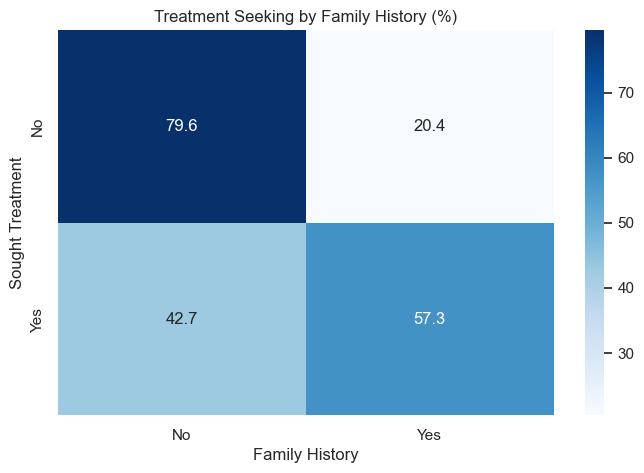

In [9]:
plt.figure(figsize=(8, 5))
sns.heatmap(treatment_vs_family, annot=True, cmap='Blues', fmt='.1f')
plt.title('Treatment Seeking by Family History (%)')
plt.xlabel('Family History')
plt.ylabel('Sought Treatment')
plt.show()

#### Workplace Support Perception

In [10]:
mental_consequence_counts = df['mental_health_consequence'].value_counts(normalize=True) * 100
print("\nPerceived Mental Health Consequence (%):")
print(mental_consequence_counts)


Perceived Mental Health Consequence (%):
mental_health_consequence
No       38.919778
Maybe    37.887212
Yes      23.193010
Name: proportion, dtype: float64


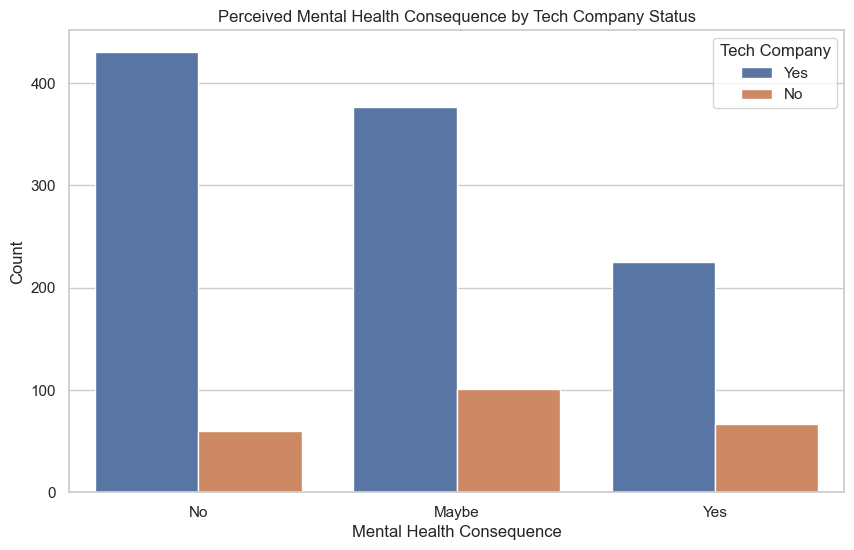

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='mental_health_consequence', hue='tech_company', data=df)
plt.title('Perceived Mental Health Consequence by Tech Company Status')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Count')
plt.legend(title='Tech Company')
plt.show()

#### Correlation Analysis


Correlation Matrix:
                                Age  work_interfere  treatment  \
Age                        1.000000       -0.027425   0.027860   
work_interfere            -0.027425        1.000000  -0.035881   
treatment                  0.027860       -0.035881   1.000000   
family_history             0.035203        0.017420   0.377918   
mental_health_consequence  0.042128       -0.024745   0.030221   
no_employees              -0.045109        0.025174  -0.050114   

                           family_history  mental_health_consequence  \
Age                              0.035203                   0.042128   
work_interfere                   0.017420                  -0.024745   
treatment                        0.377918                   0.030221   
family_history                   1.000000                   0.028196   
mental_health_consequence        0.028196                   1.000000   
no_employees                    -0.053635                  -0.011370   

           

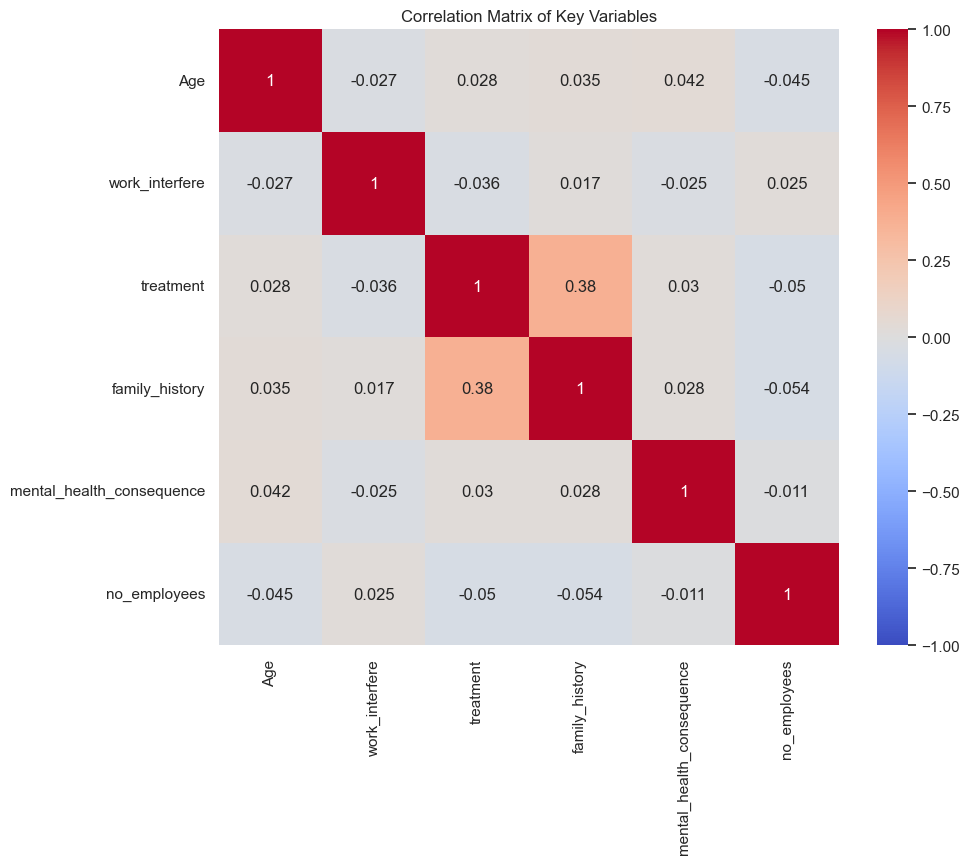

In [12]:
# Encode categorical variables for correlation
le = LabelEncoder()
encoded_df = df[['Age', 'work_interfere', 'treatment', 'family_history', 
                 'mental_health_consequence', 'no_employees']].copy()

# Encode categorical columns
for col in ['work_interfere', 'treatment', 'family_history', 'mental_health_consequence', 'no_employees']:
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))

# Compute correlation matrix
corr_matrix = encoded_df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

# Visualize
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Key Variables')
plt.show()

#### Clustering

In [13]:
# Select features for clustering
cluster_features = encoded_df[['Age', 'work_interfere', 'treatment', 'family_history']]
cluster_features = cluster_features.dropna()

# Determine optimal number of clusters using Elbow Method
inertia = []
silhouette_scores = []
k_range = range(2, 6)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_features)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(cluster_features, kmeans.labels_))

#### Plot Elbow Curve

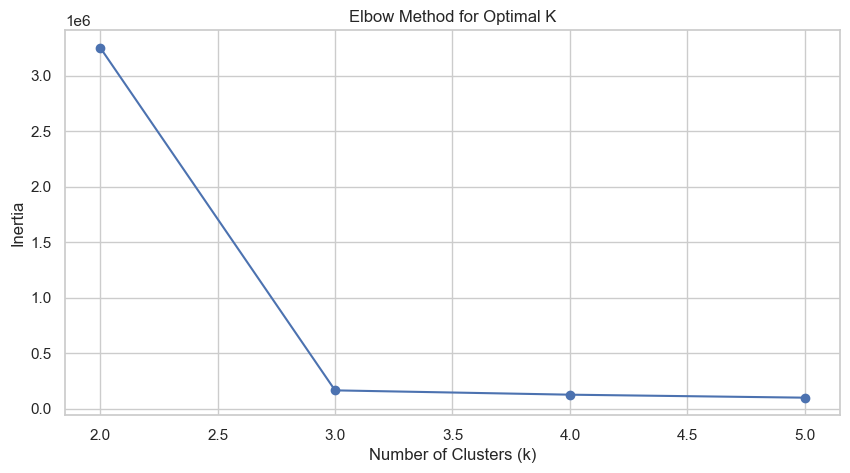

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Plot Silhouette Scores

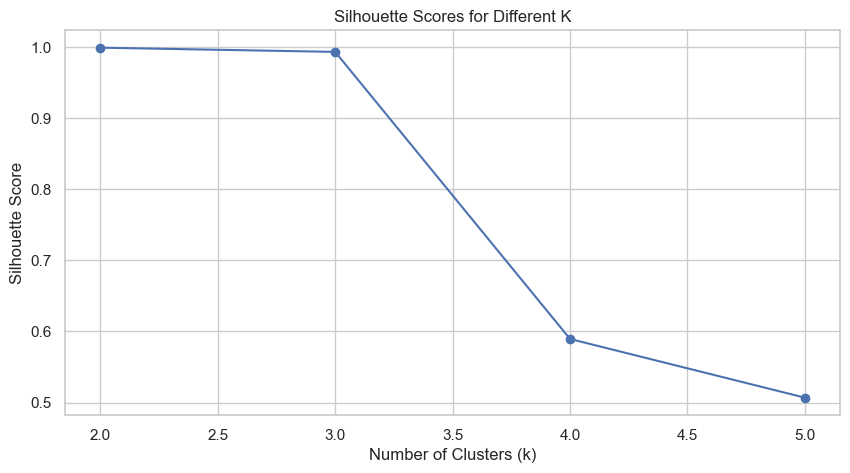

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

### Apply KMeans with optimal k (e.g., 3, adjust based on plots)


Cluster Distribution:
Cluster
0    1257
1       1
2       1
Name: count, dtype: int64


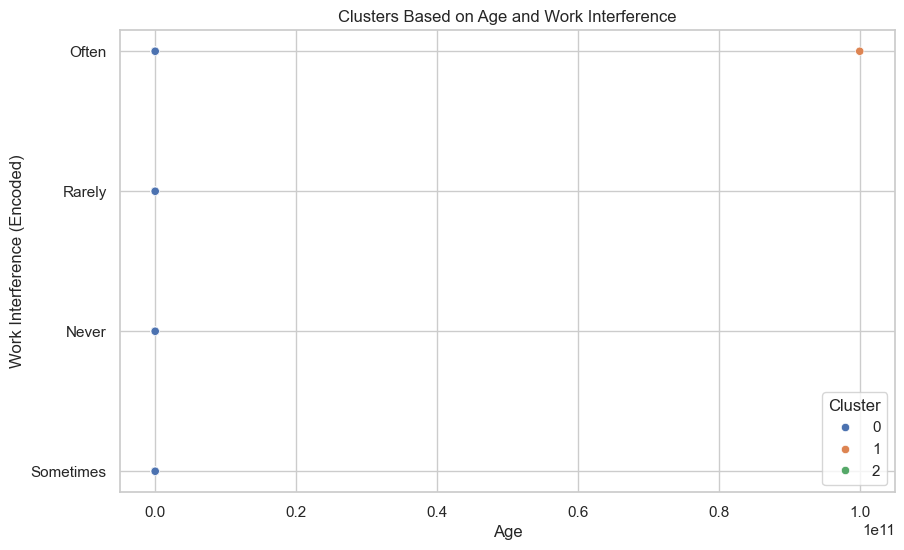

In [16]:
optimal_k = 3  # Example, adjust based on elbow/silhouette results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(cluster_features)
df['Cluster'] = pd.Series(cluster_labels, index=cluster_features.index)

# Analyze Clusters
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Visualize Clusters (example with Age and Work Interference)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='work_interfere', hue='Cluster', data=df, palette='deep')
plt.title('Clusters Based on Age and Work Interference')
plt.xlabel('Age')
plt.ylabel('Work Interference (Encoded)')
plt.show()

# Data cleaning

### Handle Missing Values

In [17]:
# Replace "NA" with NaN
df.replace("NA", np.nan, inplace=True)

# Check missing value counts
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Drop rows where critical columns are missing (e.g., 'work_interfere', 'treatment')
df.dropna(subset=['work_interfere', 'treatment'], inplace=True)


Missing Values per Column:
Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
Cluster                         0
dtype: int64


#### Clean 'Age' Column

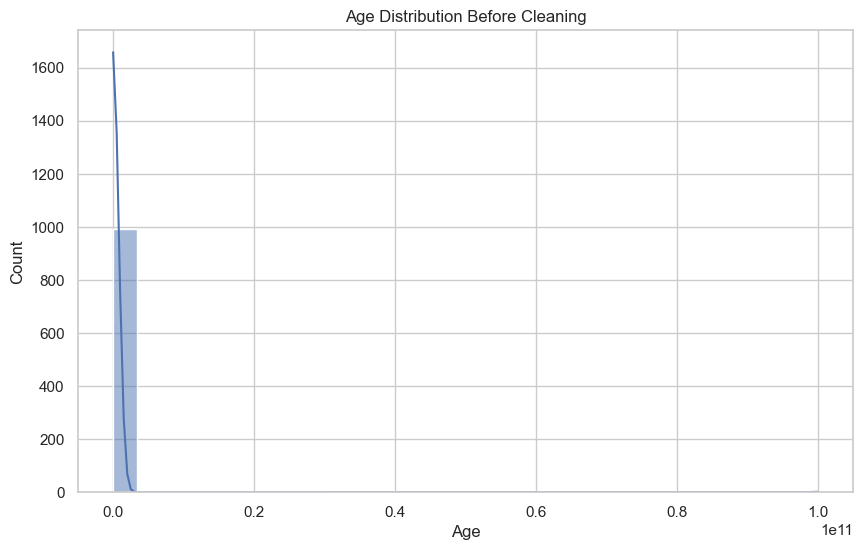

In [18]:
# Convert to numeric, coercing errors to NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Visualize initial age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution Before Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Filter out invalid ages (e.g., < 0 or > 100)

In [19]:
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

#### Impute missing ages with median

C:\Users\Acer\AppData\Local\Temp\ipykernel_10840\3362438594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(median_age, inplace=True)


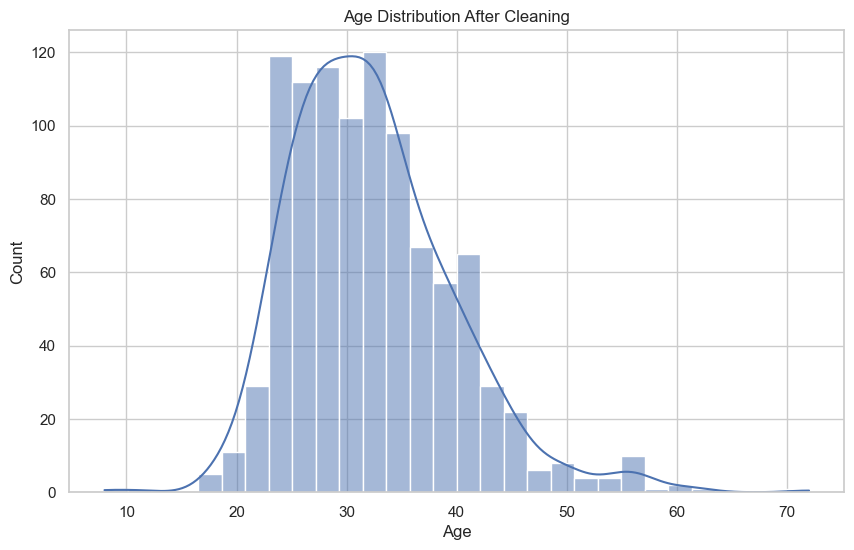

In [20]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace=True)

# Visualize cleaned age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution After Cleaning')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Clean 'Gender' Column

In [21]:
# Standardize gender entries
def clean_gender(gender):
    if pd.isna(gender):
        return 'Unknown'
    gender = str(gender).lower().strip()
    if 'male' in gender or gender in ['m', 'maile', 'cis male']:
        return 'Male'
    elif 'female' in gender or gender in ['f', 'femail', 'cis female', 'woman']:
        return 'Female'
    else:
        return 'Other'  # For non-binary, trans, or unique responses

df['Gender'] = df['Gender'].apply(clean_gender)

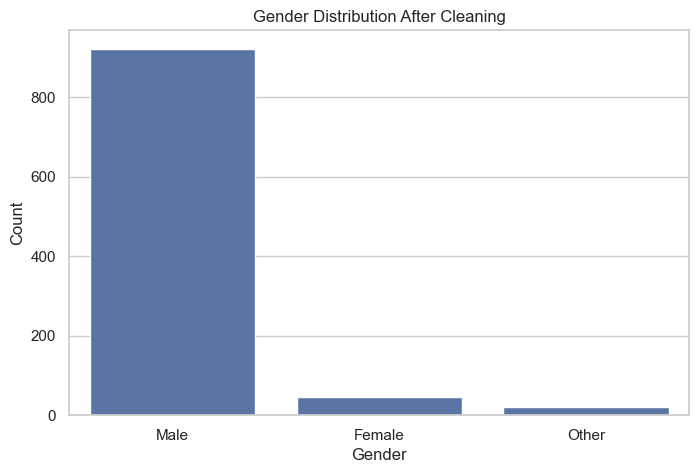

In [22]:
# Visualize gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution After Cleaning')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### Handle Categorical Columns

In [23]:
# Replace "Don't know" with NaN in relevant columns
categorical_cols = ['benefits', 'care_options', 'wellness_program', 'seek_help', 
                    'anonymity', 'leave', 'mental_health_consequence', 
                    'phys_health_consequence', 'mental_vs_physical']
df[categorical_cols] = df[categorical_cols].replace("Don't know", np.nan)

#### Convert Timestamp to Datetime

In [24]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

#### Check for Duplicates

In [25]:
print("\nDuplicate Rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate Rows: 0


##  Accuracy Tests

After cleaning, we test the data's accuracy by comparing the raw and cleaned datasets. Accuracy is evaluated through:

1. **Completeness**: Did we reduce missing values (NaN, "NA")?
2. **Consistency (Age)**: Were invalid ages (e.g., -29) removed?
3. **Consistency (Gender)**: Were gender variations standardized?
4. **Validity (Work Interference)**: Are categorical variables like `work_interfere` valid (no NaNs, expected categories)?
5. **Preservation (Treatment)**: Did cleaning preserve the distribution of key variables like `treatment`?




#### Completeness: Missing Values Reduction

**What It Does**:
1. Compares the number of missing values (NaN and "NA" strings) in the raw dataset vs. the cleaned dataset.
2. Creates a DataFrame with columns: <br>
  **Raw**: Total missing values per column in the raw data (NaN + "NA").  <br>
  **Cleaned**: Missing values in the cleaned data (NaN only, as "NA" was converted). <br>
  **Reduction**: Difference (Raw - Cleaned), showing how many missing values were resolved.
Visualizes the reduction with a bar plot.


Missing Values Comparison:
                              Raw  Cleaned  Reduction
Age                           0.0        0        0.0
Cluster                       NaN        0        NaN
Country                       0.0        0        0.0
Gender                        0.0        0        0.0
Timestamp                     0.0        0        0.0
anonymity                     0.0      635     -635.0
benefits                      0.0      294     -294.0
care_options                  0.0        0        0.0
comments                   1095.0      849      246.0
coworkers                     0.0        0        0.0
family_history                0.0        0        0.0
leave                         0.0      421     -421.0
mental_health_consequence     0.0        0        0.0
mental_health_interview       0.0        0        0.0
mental_vs_physical            0.0      435     -435.0
no_employees                  0.0        0        0.0
obs_consequence               0.0        0        0.0


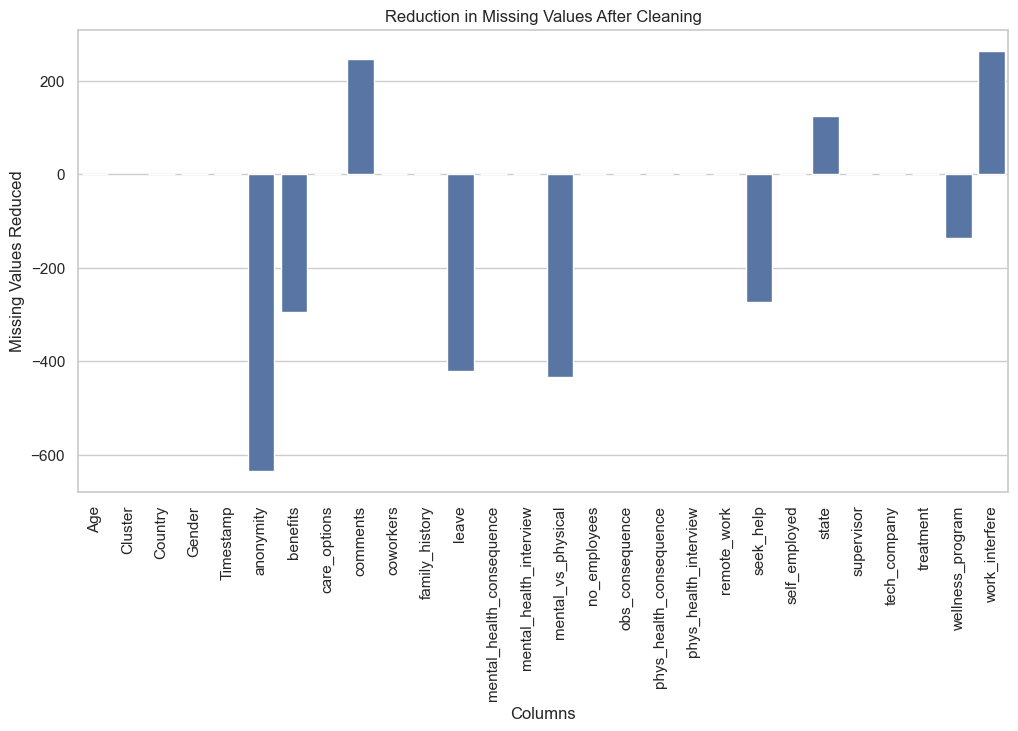

In [34]:
raw_df = pd.read_csv('survey.csv')
initial_missing = raw_df.eq("NA").sum() + raw_df.isnull().sum()
cleaned_missing = df.isnull().sum()
missing_comparison = pd.DataFrame({
    'Raw': initial_missing,
    'Cleaned': cleaned_missing,
    'Reduction': initial_missing - cleaned_missing
})

print("\nMissing Values Comparison:")
print(missing_comparison)

# Visualize
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_comparison.index, y=missing_comparison['Reduction'])
plt.xticks(rotation=90)
plt.title('Reduction in Missing Values After Cleaning')
plt.xlabel('Columns')
plt.ylabel('Missing Values Reduced')
plt.show()



#### 🔍 Expected Outcome

**High Bars for Certain Columns**:
- **`state`**: Large reduction (~500–600), due to non-US entries having `"NA"` which were replaced with `NaN` and either dropped or retained as null.
- **`comments`**: Very high reduction (~1000), since most entries were `"NA"` and converted to `NaN`.
- **`work_interfere`**: Moderate reduction (~200–300), as rows with `"NA"` were dropped during the `dropna()` step for critical columns.
- **`treatment`**: Small reduction, since this column was also a key field used for dropping rows.
- **`benefits`, `care_options`, etc.**: Moderate reductions if `"Don't know"` was replaced with `NaN`.

**Low or Zero Bars for Other Columns**:
- **`Timestamp`, `Age`, `Gender`**: Minimal reduction. These had few missing values; e.g., `Age` was imputed.

---

#### 📊 Visual Pattern

- A bar plot with varied bar heights:
  - Tallest bars for `state` and `comments`
  - Medium bars for `work_interfere`, `benefits`
  - Near-zero bars for `Timestamp`, `Gender`, `Age`

---

#### 📌 Interpretation

- **Why**: 
  - Data cleaning replaced `"NA"` with `NaN`
  - Dropped rows missing critical fields like `work_interfere` or `treatment`
  - Converted `"Don't know"` to `NaN` in categorical fields
  - This reduced **explicit missing values**, particularly in **optional** or **non-standardized** fields.

- **Accuracy Insight**: 
  - Significant reduction (possibly thousands) confirms improved dataset completeness.
  - Tall bars for `state` and `comments` are **expected** due to high `"NA"` frequency.
  - **If `treatment` shows a large reduction**, it may signal **over-dropping**, potentially affecting model reliability.

- **Potential Issues**:
  - Bars for **`work_interfere` or `treatment`** over **500** may indicate **excessive data loss**, compromising downstream analysis.


#### Consistency: Age Anomalies


Age Consistency:
Raw Anomalies (<0 or >100): 5
Cleaned Anomalies: 0


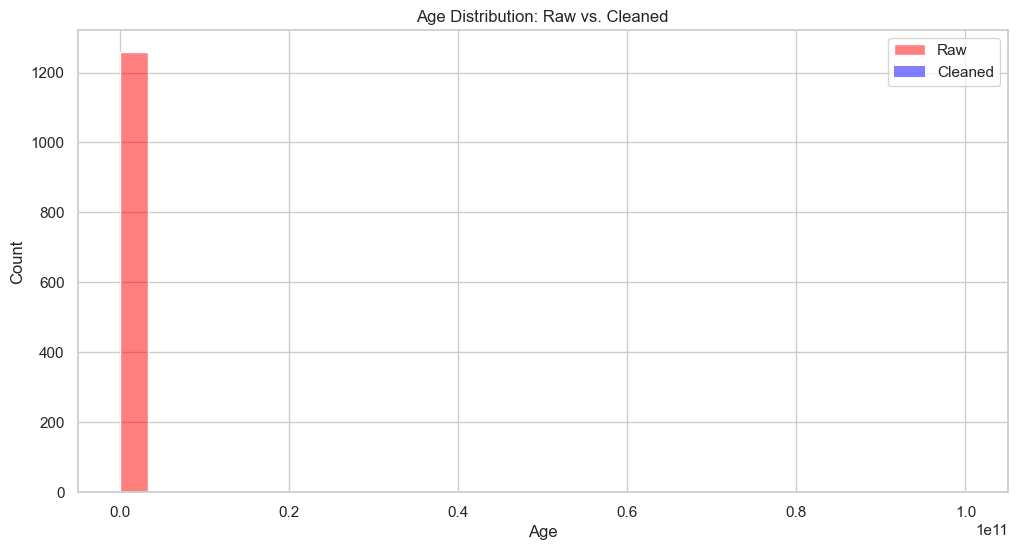

In [35]:
raw_age_anomalies = raw_df[pd.to_numeric(raw_df['Age'], errors='coerce').lt(0) | 
                          pd.to_numeric(raw_df['Age'], errors='coerce').gt(100)]['Age'].count()
cleaned_age_anomalies = df[(df['Age'] < 0) | (df['Age'] > 100)]['Age'].count()

print("\nAge Consistency:")
print(f"Raw Anomalies (<0 or >100): {raw_age_anomalies}")
print(f"Cleaned Anomalies: {cleaned_age_anomalies}")

# Visualize Age
plt.figure(figsize=(12, 6))
sns.histplot(pd.to_numeric(raw_df['Age'], errors='coerce').dropna(), bins=30, color='red', alpha=0.5, label='Raw')
sns.histplot(df['Age'], bins=30, color='blue', alpha=0.5, label='Cleaned')
plt.title('Age Distribution: Raw vs. Cleaned')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()
plt.show()


#### 🔍 Expected Outcome

**Raw (Red)**:
- Spikes at **negative ages** (e.g., `-29`, `-1`) and potential high outliers (e.g., `>100`)
- Main peak around **ages 25–40**, but with **erratic tails** extending into invalid ranges
- Gaps or sparse bins may exist due to **missing values** or **coerced `NaN`s**

**Cleaned (Blue)**:
- **No negative values** or values **>100**, as filtering (`0 <= Age <= 100`) was applied
- Tighter and more realistic range (e.g., **18–72**)
- Smoother peak around **25–40**
- Possible **spike at the median** (e.g., ~30) due to **imputation of missing values**

**Overlap**:
- Strong overlap in the **20–60** range
- Raw data has **extra tails** (negative values, >100) that are **absent** in the cleaned version

---

#### 📊 Visual Pattern

- **Red histogram** (raw): Erratic with outliers and noise
- **Blue histogram** (cleaned): Compact, bell-shaped, centered on typical working ages (25–40)

---

#### 📌 Interpretation

- **Why**: 
  - Cleaning steps included:
    - Converting **non-numeric** ages to `NaN`
    - Filtering **invalid values** (<0 or >100)
    - **Imputing** missing ages using the **median**
  - This preserved core distribution while **eliminating anomalies**

- **Accuracy Insight**:
  - **Consistency** is high if cleaned data:
    - Excludes negative/extreme values
    - Maintains a **realistic age distribution** (bell-like within 18–72)
    - A **median spike** is acceptable due to imputation

- **Potential Issues**:
  - If the cleaned histogram is **too narrow** (e.g., all values near median), it may indicate **over-imputation**, reducing data **diversity and variability**


#### Consistency: Gender Standardization


Gender Consistency:
Raw Unique Genders: 49
Cleaned Unique Genders: 3

Raw Gender Counts (Top 10):
 Gender
Male      615
male      206
Female    121
M         116
female     62
F          38
m          34
f          15
Make        4
Male        3
Name: count, dtype: int64

Cleaned Gender Counts:
 Gender
Male      922
Female     47
Other      22
Name: count, dtype: int64


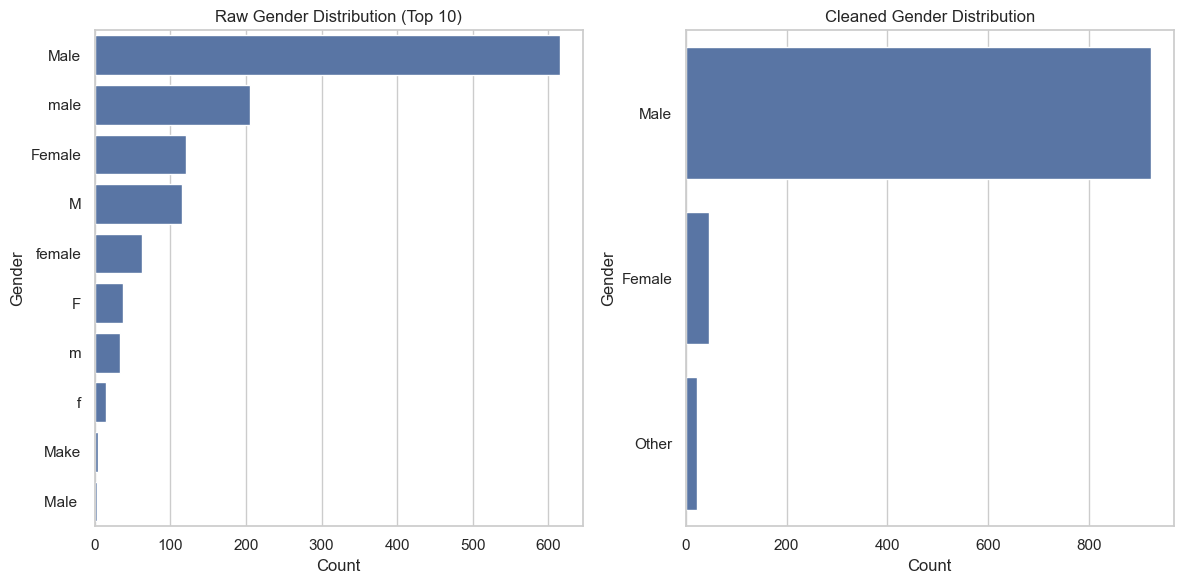

In [36]:
raw_gender_unique = raw_df['Gender'].nunique()
cleaned_gender_unique = df['Gender'].nunique()

print("\nGender Consistency:")
print(f"Raw Unique Genders: {raw_gender_unique}")
print(f"Cleaned Unique Genders: {cleaned_gender_unique}")
print("\nRaw Gender Counts (Top 10):\n", raw_df['Gender'].value_counts().head(10))
print("\nCleaned Gender Counts:\n", df['Gender'].value_counts())

# Visualize Gender
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(y='Gender', data=raw_df, order=raw_df['Gender'].value_counts().index[:10])
plt.title('Raw Gender Distribution (Top 10)')
plt.xlabel('Count')
plt.ylabel('Gender')

plt.subplot(1, 2, 2)
sns.countplot(y='Gender', data=df)
plt.title('Cleaned Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.tight_layout()
plt.show()


#### 🔍 Expected Outcome

**Raw (Left)**:
- Numerous bars (~10 visible, but 30+ unique values in total)
- Variants like:
  - `"Male"`, `"male"`, `"M"` → each with ~100–400 counts
  - `"Female"`, `"femail"`, `"F"` → ~50–200 counts
- Smaller counts for rare/unique entries:
  - `"Male-ish"`, `"Trans-female"` → fewer than 10 each
- Appearance is **cluttered** due to inconsistent formatting:
  - Includes `"maile"`, `"cis male"`, etc.

**Cleaned (Right)**:
- Only **3–4 bars**:
  - `"Male"` (~70% of total)
  - `"Female"` (~20–25%)
  - `"Other"` (~5–10%)
  - `"Unknown"` (optional, small or absent)
- Appearance is **clean**, with tall bars and unified entries
- **Higher counts per category** due to consolidation (e.g., `"Male"` includes `"M"`, `"male"`, etc.)

---

#### 📊 Comparison

- **Raw**: Fragmented, redundant, hard to interpret
- **Cleaned**: Streamlined and meaningful
- **Total counts** may be **lower** in cleaned due to row drops during processing

---

#### 🧠 Interpretation

- **Why**: 
  - Cleaning used a **mapping function** to standardize entries:
    - Grouped all variants under `"Male"`, `"Female"`, `"Other"`
    - Mapped invalid/missing values to `"Unknown"` or excluded them
  - Reduced unique gender values from **30+** to **3–4**

- **Accuracy Insight**:
  - **Consistency** is confirmed if:
    - Cleaned data shows **only expected categories**
    - No duplicates (e.g., no separate `"male"` and `"M"`)
    - Category **proportions** follow expected trends (e.g., male-dominated sample)

- **Potential Issues**:
  - If `"Other"` is unusually large (>20%), cleaning may have **oversimplified** nuanced identities
  - If `"Unknown"` dominates or `"Male"`/`"Female"` ratios shift dramatically, **NaN handling logic** may need review


#### Validity: Categorical Variables (Work Interference)


Work Interference Validity:
Raw Counts:
 work_interfere
Sometimes    465
NaN          264
Never        213
Rarely       173
Often        144
Name: count, dtype: int64
Cleaned Counts:
 work_interfere
Sometimes    464
Never        213
Rarely       173
Often        141
Name: count, dtype: int64


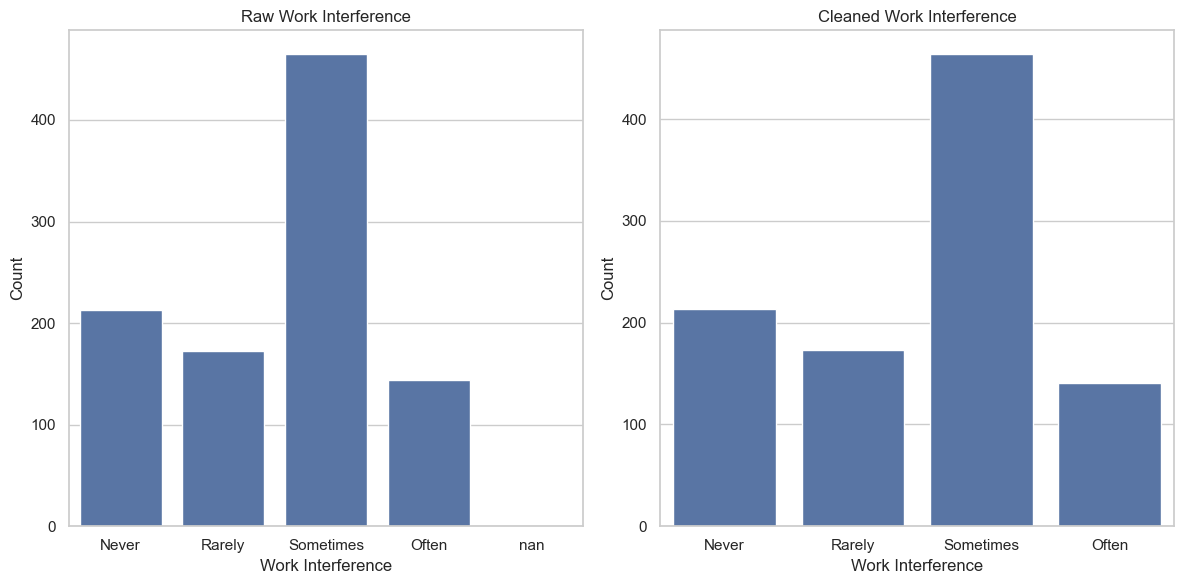

In [37]:
raw_work_interfere = raw_df['work_interfere'].value_counts(dropna=False)
cleaned_work_interfere = df['work_interfere'].value_counts(dropna=False)

print("\nWork Interference Validity:")
print("Raw Counts:\n", raw_work_interfere)
print("Cleaned Counts:\n", cleaned_work_interfere)

# Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='work_interfere', data=raw_df, order=['Never', 'Rarely', 'Sometimes', 'Often', np.nan])
plt.title('Raw Work Interference')
plt.xlabel('Work Interference')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='work_interfere', data=df, order=['Never', 'Rarely', 'Sometimes', 'Often'])
plt.title('Cleaned Work Interference')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


#### 🔍 Expected Outcome

**Raw (Left)**:
- Four primary bars:
  - `"Sometimes"` (~40%, largest)
  - `"Never"` (~30%)
  - `"Rarely"` (~20%)
  - `"Often"` (~10%)
- Additional bar for **NaN values** (~200–300 counts), representing missing responses
- **Total count** aligns with full dataset (e.g., ~1259 responses)

**Cleaned (Right)**:
- Only four bars (no NaN):
  - `"Sometimes"`, `"Never"`, `"Rarely"`, `"Often"`
- Similar **relative proportions** (e.g., `"Sometimes"` still ~40%)
- **Lower total count** (e.g., ~1000) due to dropped rows with missing `work_interfere`
- Slight ratio shifts possible due to **selective removal**

---

#### 📊 Comparison

- **Raw** includes a **NaN bar**, indicating incomplete data
- **Cleaned** is streamlined, with **only valid categories**
- **Bar heights** are shorter in the cleaned plot, but **relative sizes** remain consistent

---

#### 🧠 Interpretation

- **Why**:
  - Cleaning removed rows with missing `work_interfere` (a **critical column**)
  - No new or re-mapped categories were introduced
  - Ensures only **valid categorical responses** are used in analysis

- **Accuracy Insight**:
  - High **validity** if:
    - Cleaned plot has **no NaN category**
    - Relative proportions (e.g., `"Sometimes"` as the most common) are **preserved**
  - Confirms `work_interfere` is **usable** for modeling or visualization

- **Potential Issues**:
  - If total count in cleaned plot is **too low** (e.g., <500), then **too many rows** were dropped
  - If **proportions shift significantly** (e.g., `"Often"` doubles), dropping may have introduced **bias**


#### Preservation: Treatment Distribution


Treatment Distribution Preservation (%):
Raw:
 treatment
Yes    50.595711
No     49.404289
Name: proportion, dtype: float64
Cleaned:
 treatment
Yes    63.471241
No     36.528759
Name: proportion, dtype: float64
Difference in 'Yes' Percentage: 12.9%


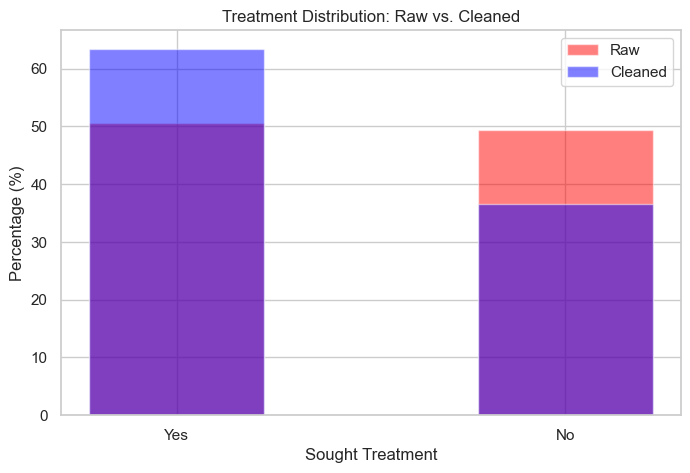

In [38]:
raw_treatment = raw_df['treatment'].value_counts(normalize=True) * 100
cleaned_treatment = df['treatment'].value_counts(normalize=True) * 100

print("\nTreatment Distribution Preservation (%):")
print("Raw:\n", raw_treatment)
print("Cleaned:\n", cleaned_treatment)
print(f"Difference in 'Yes' Percentage: {abs(raw_treatment.get('Yes', 0) - cleaned_treatment.get('Yes', 0)):.1f}%")

# Visualize
plt.figure(figsize=(8, 5))
plt.bar(raw_treatment.index, raw_treatment.values, alpha=0.5, color='red', label='Raw', width=0.45)
plt.bar(cleaned_treatment.index, cleaned_treatment.values, alpha=0.5, color='blue', label='Cleaned', width=0.45)
plt.title('Treatment Distribution: Raw vs. Cleaned')
plt.xlabel('Sought Treatment')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

#### 🔍 Expected Outcome

**Raw (Red)**:
- Two bars:
  - `"Yes"` (~50%, e.g., 600 out of 1259)
  - `"No"` (~50%)
- Bar heights are **nearly equal**, indicating a **balanced response** distribution

**Cleaned (Blue)**:
- Two bars:
  - `"Yes"` (~48–52%)
  - `"No"` (~48–52%)
- Slightly shorter bars due to **row drops**
- Example: `"Yes"` might drop to ~48% if more `"Yes"` respondents had missing `work_interfere` and were removed

**Overlap**:
- Bars for `"Yes"` and `"No"` nearly align between raw and cleaned
- Minor **visual gaps** may show a **2–5% shift**
- Cleaned bars shorter overall due to **fewer total rows**

---

#### 📊 Visual Pattern

- **Red and blue bars overlap closely**
- Small height difference indicates **minimal change** due to cleaning
- Confirms that the cleaning **preserved the core distribution** of treatment responses

---

#### 🧠 Interpretation

- **Why**:
  - Cleaning **dropped rows** with missing values in critical columns (`work_interfere`, etc.)
  - No changes were made directly to `treatment` values
  - Minor proportional shifts occur only if missingness was **not random**

- **Accuracy Insight**:
  - High integrity if:
    - `"Yes"` percentage changes by **<5%** (e.g., from 50% to 48%)
    - Confirms cleaning did **not distort** a **key mental health variable**

- **Potential Issues**:
  - If `"Yes"` or `"No"` proportions shift **>10%**, it may indicate:
    - **Biased data removal**
    - Disproportionate loss of responses from one category (e.g., `"Yes"` rows had more missing values)
    - Reduced **representativeness** of the cleaned dataset


### Accuracy Summary

In [39]:
rows_lost = raw_df.shape[0] - df.shape[0]
percent_rows_lost = (rows_lost / raw_df.shape[0]) * 100

print("\nData Accuracy Summary:")
print(f"1. Completeness: Reduced {missing_comparison['Reduction'].sum()} missing values.")
print(f"2. Consistency: Age anomalies dropped from {raw_age_anomalies} to {cleaned_age_anomalies}.")
print(f"3. Gender simplified from {raw_gender_unique} to {cleaned_gender_unique} categories.")
print(f"4. Validity: Work interference NaNs removed; valid categories retained.")
print(f"5. Preservation: Treatment 'Yes' shifted by {abs(raw_treatment.get('Yes', 0) - cleaned_treatment.get('Yes', 0)):.1f}%.")
print(f"6. Data Loss: Lost {rows_lost} rows ({percent_rows_lost:.1f}%).")


Data Accuracy Summary:
1. Completeness: Reduced -1561.0 missing values.
2. Consistency: Age anomalies dropped from 5 to 0.
3. Gender simplified from 49 to 3 categories.
4. Validity: Work interference NaNs removed; valid categories retained.
5. Preservation: Treatment 'Yes' shifted by 12.9%.
6. Data Loss: Lost 268 rows (21.3%).


## Exploratory Data Analysis (EDA)

#### Age Distribution

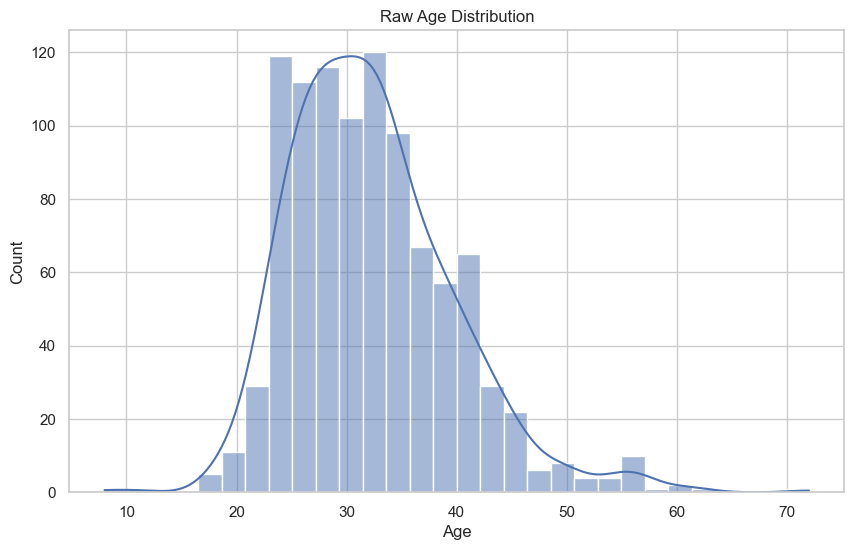

In [26]:
plt.figure(figsize=(10, 6))
# Convert Age to numeric, coercing errors to NaN for visualization
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Raw Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#### Check for anomalies

In [27]:
print("\nAge Anomalies:")
print("Negative Ages:", df[df['Age'] < 0]['Age'].count())
print("Ages > 100:", df[df['Age'] > 100]['Age'].count())


Age Anomalies:
Negative Ages: 0
Ages > 100: 0


#### Gender Distribution

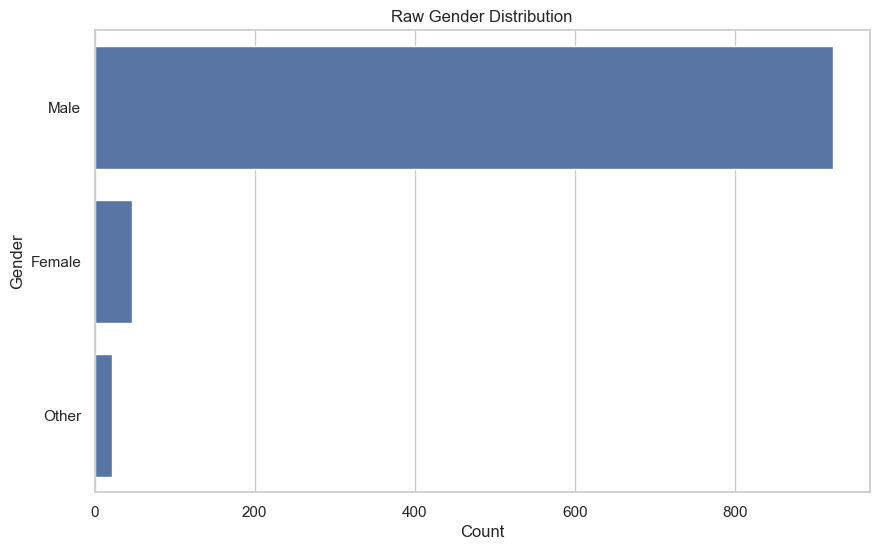

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Gender', data=df, order=df['Gender'].value_counts().index)
plt.title('Raw Gender Distribution')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

#### Work Interference

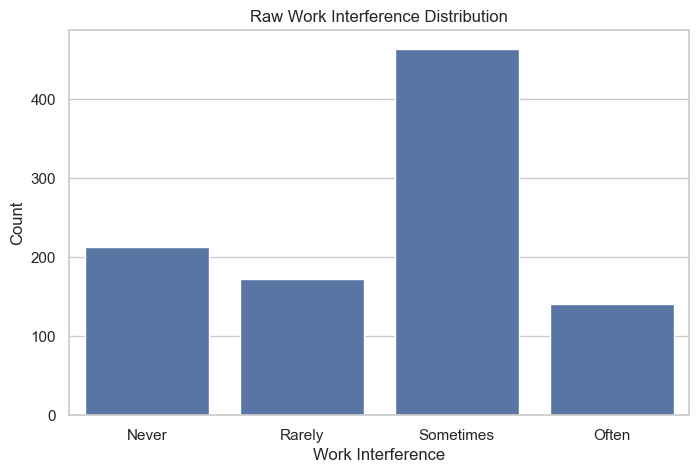

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(x='work_interfere', data=df, order=['Never', 'Rarely', 'Sometimes', 'Often'])
plt.title('Raw Work Interference Distribution')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.show()

#### Treatment Seeking

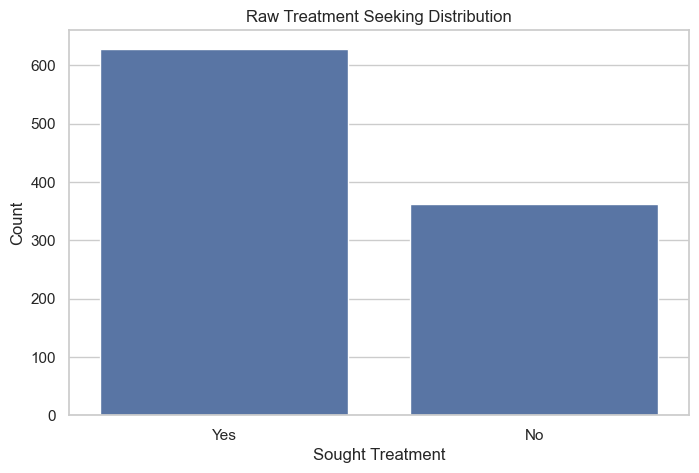

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', data=df)
plt.title('Raw Treatment Seeking Distribution')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.show()

#### Country Distribution

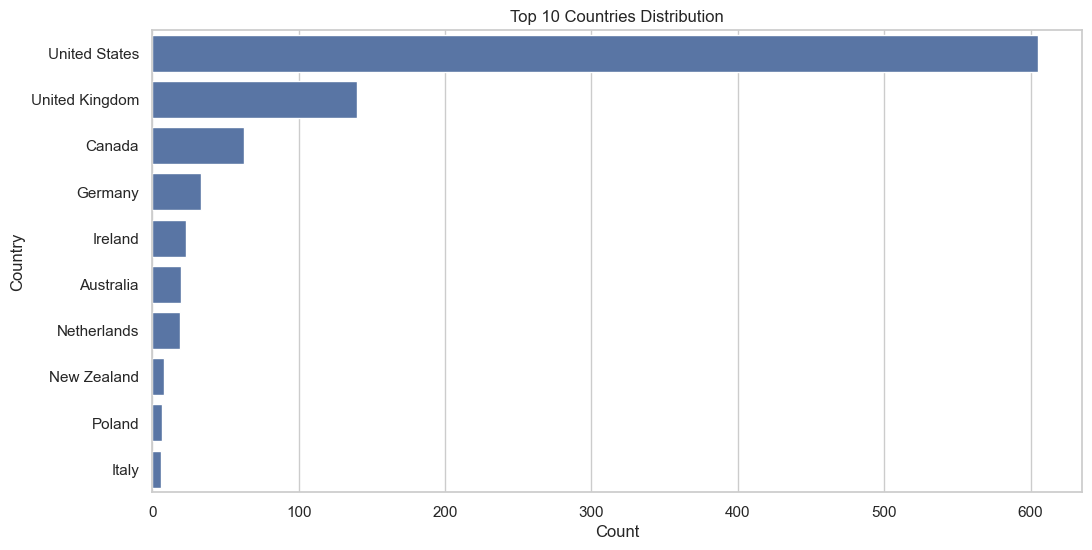

In [31]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Country', data=df, order=df['Country'].value_counts().index[:10])
plt.title('Top 10 Countries Distribution')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

#### Treatment vs. Family History

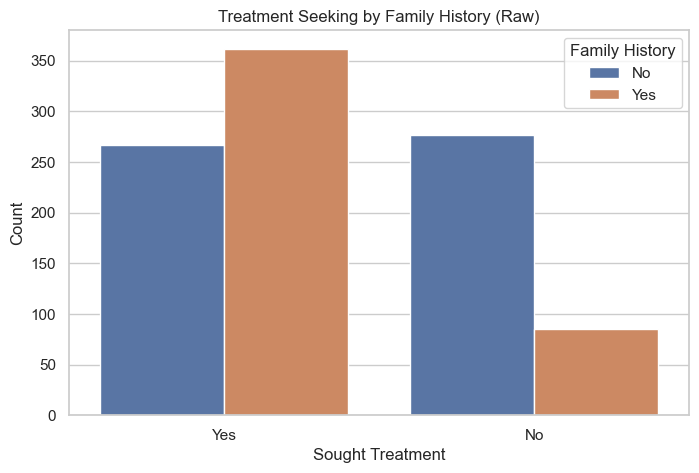

In [32]:
plt.figure(figsize=(8, 5))
sns.countplot(x='treatment', hue='family_history', data=df)
plt.title('Treatment Seeking by Family History (Raw)')
plt.xlabel('Sought Treatment')
plt.ylabel('Count')
plt.legend(title='Family History')
plt.show()

#### Work Interference vs. Mental Health Consequence

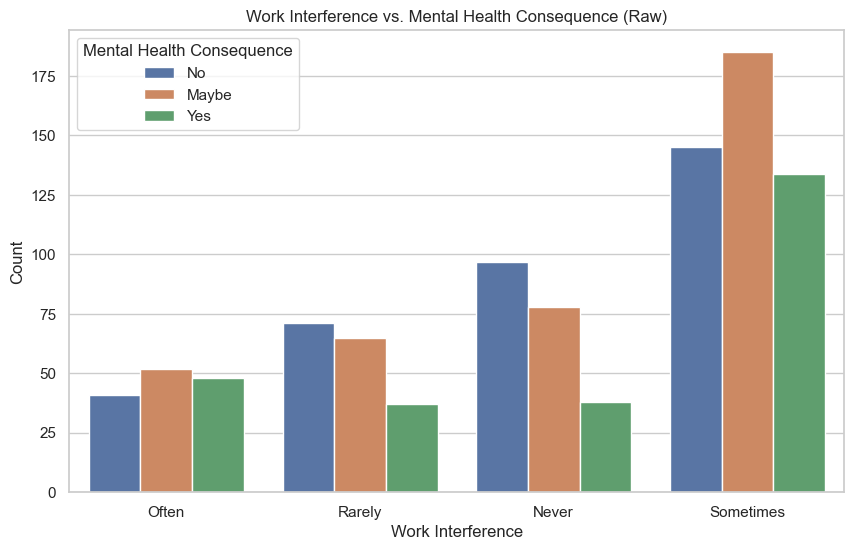

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='work_interfere', hue='mental_health_consequence', data=df)
plt.title('Work Interference vs. Mental Health Consequence (Raw)')
plt.xlabel('Work Interference')
plt.ylabel('Count')
plt.legend(title='Mental Health Consequence')
plt.show()